**Introduction**:
The metric I decided to look into was traffic. The idea behind that is that since we want to do a lot of destruction with arson we would want a scenario in which help wouldn't be able to get there quickly, specifically emergency vehicles. With higher levels of traffic it would be more difficult for emergencey vehicles to get to the situation and therefore a higher potential to do 

In [1]:
# load pandas
import pandas as pd
import numpy as np
import geopandas
from shapely.geometry import Point
NEIGHBORHOODS = geopandas.read_file("https://data.wprdc.org/dataset/e672f13d-71c4-4a66-8f38-710e75ed80a4/resource/c5a93a8e-03d7-4eb3-91a8-c6b7db0fa261/download/pittsburghpaneighborhoods-.zip")

# load data
traffic_data = pd.read_csv('https://data.wprdc.org/datastore/dump/6dfd4f8f-cbf5-4917-a5eb-fd07f4403167', index_col="neighborhood",parse_dates=True)
traffic_data2 = pd.DataFrame(traffic_data)
traffic_data.head()
%matplotlib inline
import matplotlib.pyplot as plt
def geo_to_neighborhood(latitude, longitude):
    """Converts a geolocation (latitude and longitude) to a Pittsburgh neighborhood name.

    Args:
        latitude (float): The latitude of the point.
        longitude (float): The longitude of the point.

    Returns:
        Union[str, None]: Name of the Pittsburgh neighborhood the point falls within or None if it does not fall within a neighborhood.
    """
    # Create a shapely point for the latitude and longitude
    pt = Point(longitude, latitude)
    # Loop through the neighborhoods
    for _idx, neighborhood in NEIGHBORHOODS.iterrows():
        # Check if this neighborhood contains the point
        if neighborhood["geometry"].contains(pt):
            # Return the name of the neighborhood
            return neighborhood["hood"]
    # Wasn't contained in the neighborhood
    return None

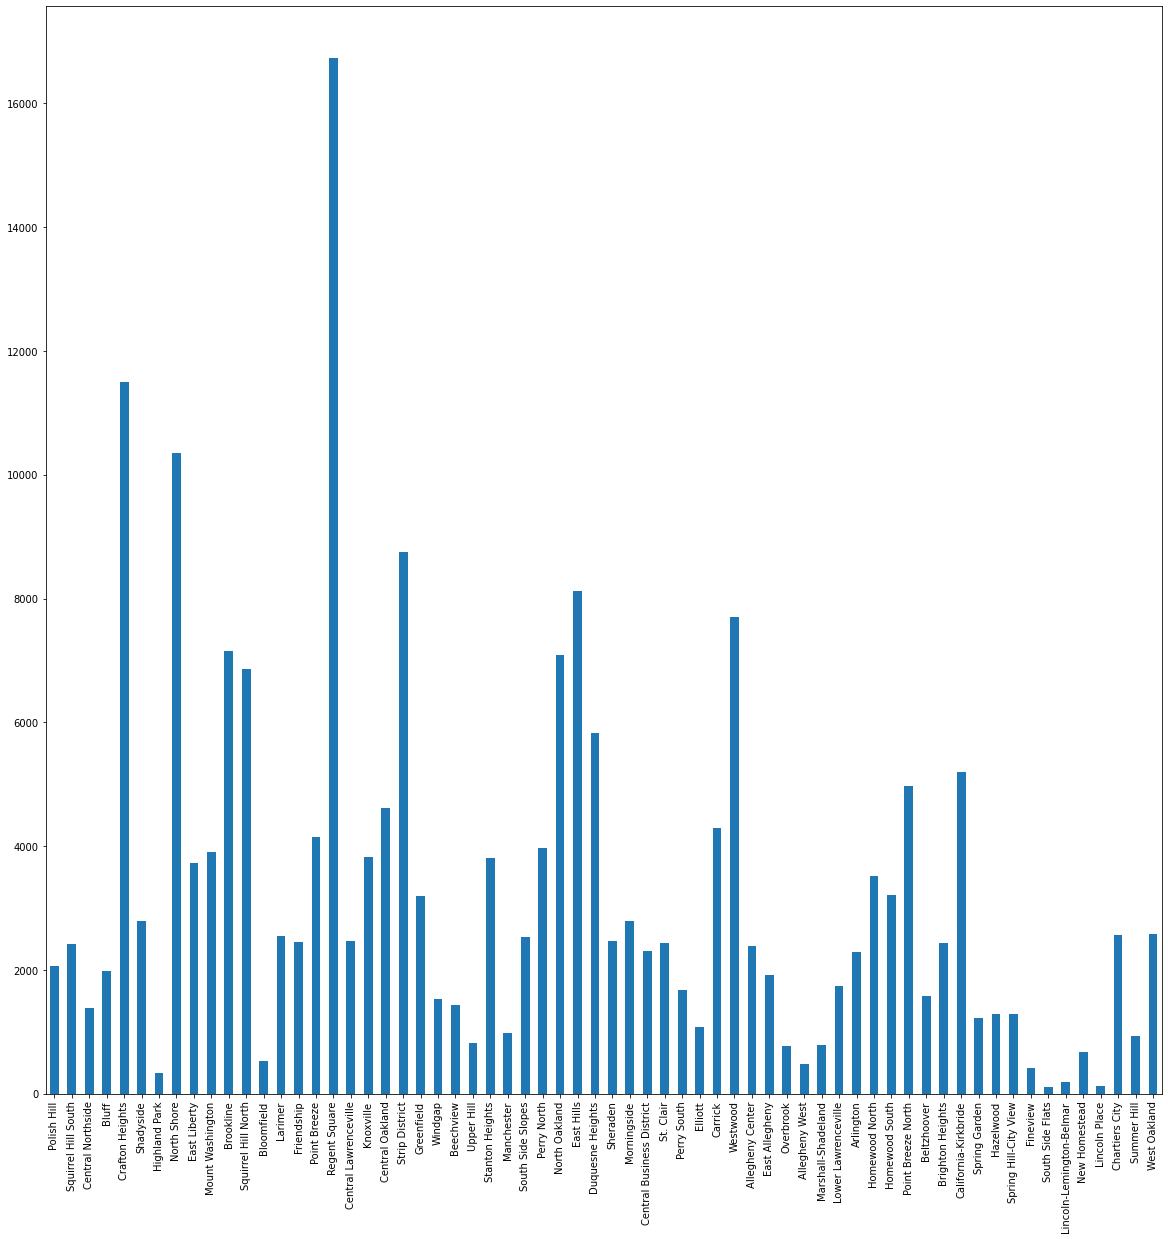

In [2]:
neighborhoods = {}
traffic_data2.dropna(subset = ['average_daily_car_traffic'], inplace=True)
for index, row in traffic_data2.iterrows():
    neighborhood = geo_to_neighborhood(row['latitude'],row['longitude'])
    if neighborhood in neighborhoods.keys():
        if row["average_daily_car_traffic"]=='NaN':
            i=4
        else:
           neighborhoods[neighborhood] = (neighborhoods[neighborhood]+row['average_daily_car_traffic'])/2
    elif neighborhood == None:
        i = 4
    else:
        if row["average_daily_car_traffic"]=='NaN':
            i=4
        else:
            neighborhoods[neighborhood]=row["average_daily_car_traffic"]

neighborhoodsDF = pd.DataFrame(neighborhoods,index=neighborhoods.keys())
neighborhoodsDF.mean().plot(kind='bar',figsize=(20,20))
#neighbhorhoods.plot(kind='bar')



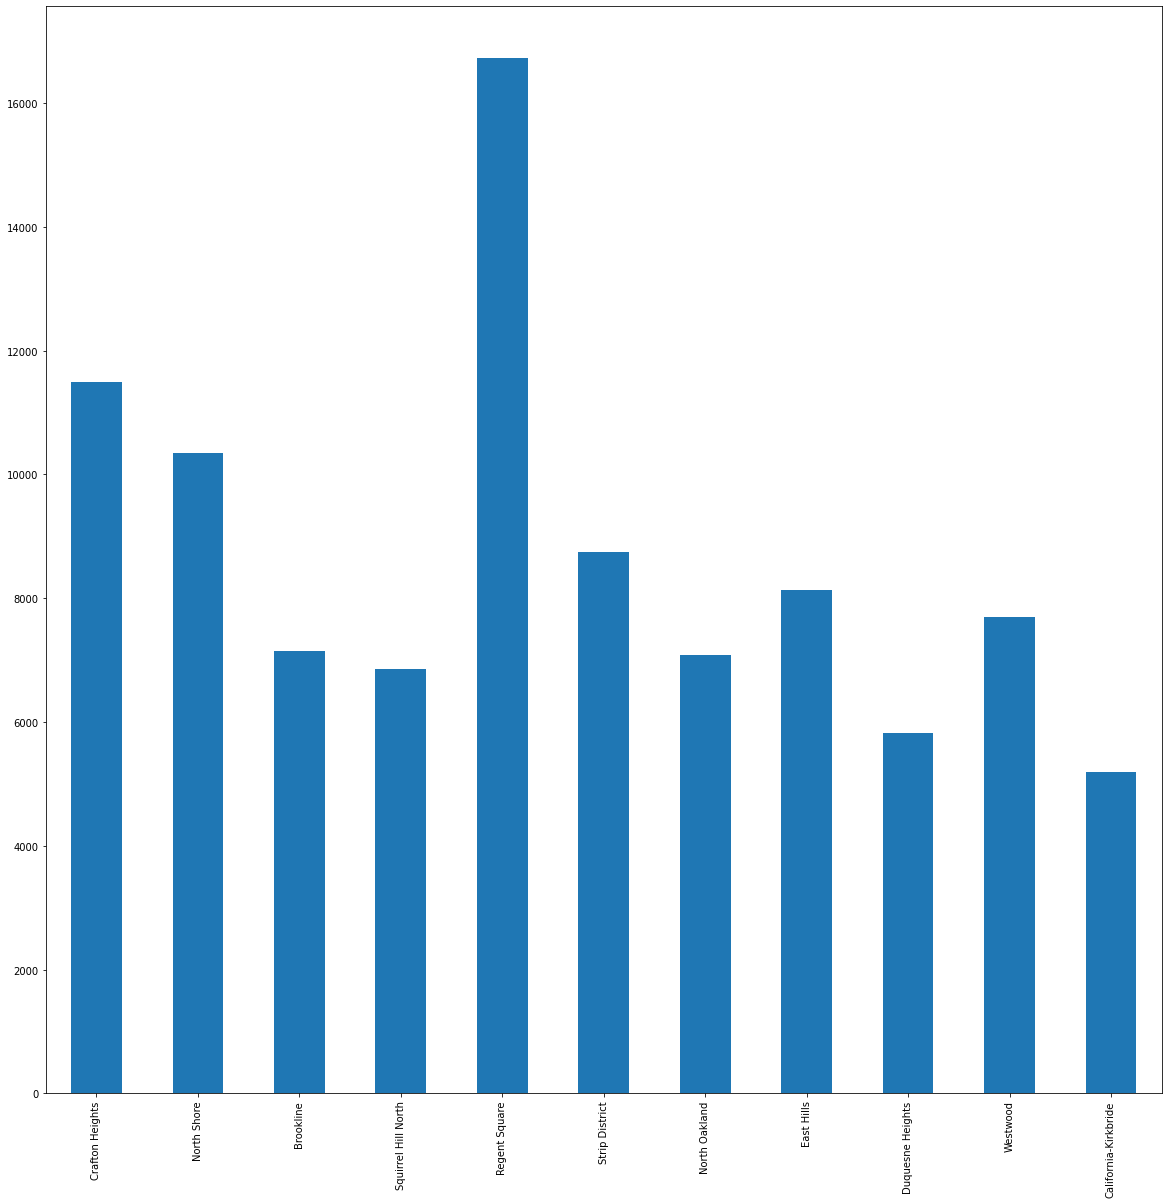

In [5]:

query_mask = neighborhoodsDF.mean()>5000
stripped = neighborhoodsDF.mean()[query_mask]
stripped.plot(kind='bar',figsize=(20,20))

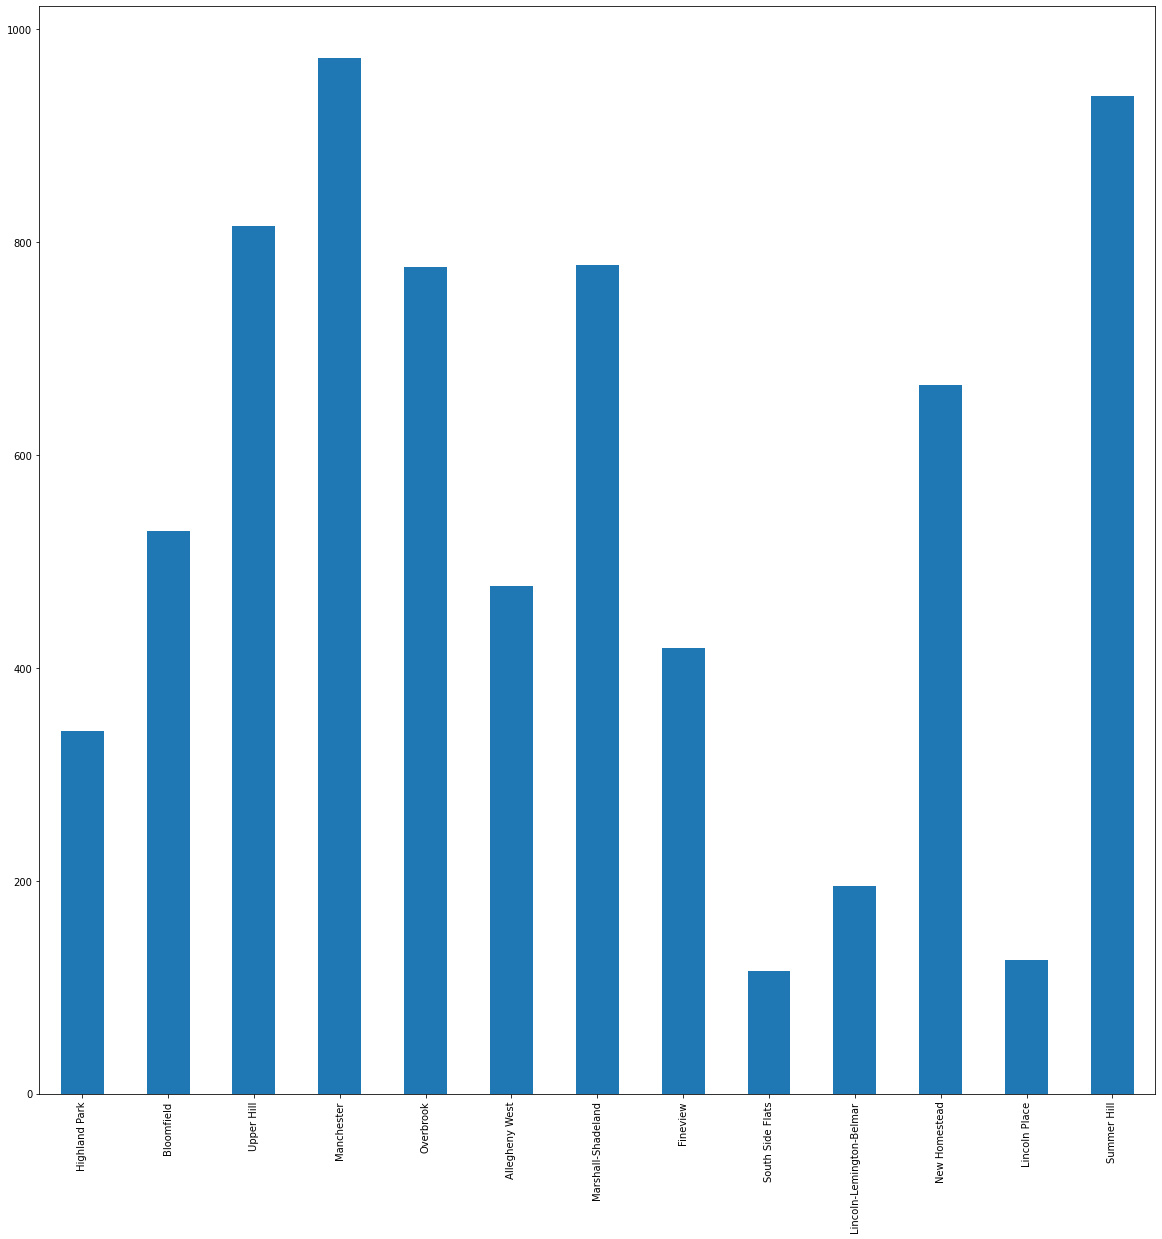

In [6]:
query_mask2 = neighborhoodsDF.mean()<1000
stripped2 = neighborhoodsDF.mean()[query_mask2]
stripped2.plot(kind='bar',figsize=(20,20))

**Conclusion** 
Regent square seems to have the most traffic by a pretty long shot, but also any marked in that graph could be reasonable contenders. Any in the bottom graph, especially South Side Flats and Lincoln Place would not be great contenders. I do personally like South Side, so I suppose that my own tastes do not exactly align with the data conveyed by this metric, however that can also be expected since I do not think I would actually love to be in a space where arson was committed. 